# Notebook for Feature Engineering

This notebook will contain a few steps to get the data ready for model training

1. Data Cleaning (removing nulls, and other bad data)
2. Feature Engineering (creating target features AUC+IC50)
3. Creating Train Test Splits (including leave out drugs and leave out cell lines)

In [55]:
import pyspark
import pandas as pd

# load in the merged dataframe, containing GDSC1, GDSC2, and cell line metadata
gdsc_merged = pd.read_csv("GDSC1and2_w_CellLineData.csv")
df = gdsc_merged
gdsc_merged.head(5)


DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0   GDSC1             342       15580432     684057            ES5   
1   GDSC1             342       15580806     684059            ES7   
2   GDSC1             342       15581198     684062          EW-11   
3   GDSC1             342       15581542     684072        SK-ES-1   
4   GDSC1             342       15581930     687448       COLO-829   

  SANGER_MODEL_ID     TCGA_DESC  DRUG_ID  DRUG_NAME PUTATIVE_TARGET  ...  \
0       SIDM00263  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
1       SIDM00269  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
2       SIDM00203  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
3       SIDM01111  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
4       SIDM00909          SKCM        1  Erlotinib            EGFR  ...   

    LN_IC50       AUC      RMSE   Z_SCORE  Sample Name  \
0  3.966813  0.985678  0.026081  1.299144          ES5   
1  2.692090  0.972690  0.110059  0.156076          ES7   
2  2.477990  0.944459  0.087019 -0.035912        EW-11   
3  2.033564  0.950758  0.016290 -0.434437      SK-ES-1   
4  2.966007  0.954778  0.180255  0.401702     COLO-829   

   GDSC_Tissue_descriptor_1  GDSC_Tissue_descriptor_2  Cancer_Type_TCGA  \
0                      bone            ewings_sarcoma               NaN   
1                      bone            ewings_sarcoma               NaN   
2                      bone            ewings_sarcoma               NaN   
3                      bone            ewings_sarcoma               NaN   
4                      skin                  melanoma              SKCM   

  Medium         Growth  
0      R       Adherent  
1      R       Adherent  
2      R       Adherent  
3      R  Semi-Adherent  
4      R       Adherent  

[5 rows x 24 columns]

In [56]:
gdsc_merged[gdsc_merged['DRUG_NAME'] == 'Etoposide']

DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
17096   GDSC1             342       15579856     683667         PFSK-1   
17097   GDSC1             342       15580187     684052           A673   
17098   GDSC1             342       15580548     684057            ES5   
17099   GDSC1             342       15580920     684059            ES7   
17100   GDSC1             342       15581313     684062          EW-11   
...       ...             ...            ...        ...            ...   
17970   GDSC1             342       15899619    1331040         SUP-M2   
17971   GDSC1             342       15900007    1331045             TK   
17972   GDSC1             342       15900380    1331048            VAL   
17973   GDSC1             342       15900744    1331049        WIL2-NS   
17974   GDSC1             342       15901118    1331050      WSU-DLCL2   

      SANGER_MODEL_ID     TCGA_DESC  DRUG_ID  DRUG_NAME PUTATIVE_TARGET  ...  \
17096       SIDM01132            MB      134  Etoposide            TOP2  ...   
17097       SIDM00848  UNCLASSIFIED      134  Etoposide            TOP2  ...   
17098       SIDM00263  UNCLASSIFIED      134  Etoposide            TOP2  ...   
17099       SIDM00269  UNCLASSIFIED      134  Etoposide            TOP2  ...   
17100       SIDM00203  UNCLASSIFIED      134  Etoposide            TOP2  ...   
...               ...           ...      ...        ...             ...  ...   
17970       SIDM00421  UNCLASSIFIED      134  Etoposide            TOP2  ...   
17971       SIDM00323          DLBC      134  Etoposide            TOP2  ...   
17972       SIDM00416          DLBC      134  Etoposide            TOP2  ...   
17973       SIDM01102  UNCLASSIFIED      134  Etoposide            TOP2  ...   
17974       SIDM00413          DLBC      134  Etoposide            TOP2  ...   

        LN_IC50       AUC      RMSE   Z_SCORE  Sample Name  \
17096  3.130794  0.906829  0.075721  0.802364       PFSK-1   
17097  0.899709  0.647650  0.064998 -0.338064         A673   
17098  3.641817  0.913505  0.176287  1.063575          ES5   
17099 -0.264232  0.458997  0.097180 -0.933017          ES7   
17100  1.412221  0.690411  0.099670 -0.076092        EW-11   
...         ...       ...       ...       ...          ...   
17970 -0.725258  0.374857  0.111511 -1.168672       SUP-M2   
17971  1.919947  0.799526  0.110878  0.183435           TK   
17972  2.483716  0.832966  0.187397  0.471607          VAL   
17973 -0.930156  0.339974  0.057107 -1.273406      WIL2-NS   
17974  4.949044  0.990581  0.032653  1.731769    WSU-DLCL2   

       GDSC_Tissue_descriptor_1        GDSC_Tissue_descriptor_2  \
17096            nervous_system                 medulloblastoma   
17097               soft_tissue                rhabdomyosarcoma   
17098                      bone                  ewings_sarcoma   
17099                      bone                  ewings_sarcoma   
17100                      bone                  ewings_sarcoma   
...                         ...                             ...   
17970                  lymphoma  anaplastic_large_cell_lymphoma   
17971                  lymphoma                 B_cell_lymphoma   
17972                  lymphoma                 B_cell_lymphoma   
17973                  lymphoma         lymphoid_neoplasm other   
17974                  lymphoma                 B_cell_lymphoma   

       Cancer_Type_TCGA Medium      Growth  
17096                MB      R    Adherent  
17097               NaN  D/F12    Adherent  
17098               NaN      R    Adherent  
17099               NaN      R    Adherent  
17100               NaN      R    Adherent  
...                 ...    ...         ...  
17970               NaN      R  Suspension  
17971              DLBC      R  Suspension  
17972              DLBC      R  Suspension  
17973               NaN      R  Suspension  
17974              DLBC      R  Suspension  

[879 rows x 24 columns]

## Data Cleaning

## Feature Engineering

## Creation of Interaction Term IC50 + AUC

In this segment we create sensitivity, disagreement and weighted averages for these terms. The goal is to have two metric targets and be able to train with either a dual output approach or a singlet output with weighted averages. I'll let the training team decided which to use or go with the one with better performance.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["z_LN_IC50", "z_AUC"]] = scaler.fit_transform(df[["LN_IC50", "AUC"]])

# For interpretability: low LN_IC50 = sensitive, low AUC = sensitive
df["z_IC50_sens"] = df["z_LN_IC50"]


# Sensitivity (average of both)
df["sensitivity"] = (df["z_IC50_sens"] + df["z_AUC"]) / 2

# Disagreement (difference between metrics)
df["disagreement"] = df["z_AUC"] - df["z_IC50_sens"]


# Weighted averages of both metrics for different α
alphas = [0.25, 0.5, 0.75]
for a in alphas:
    df[f"y_weighted_{a}"] = a * df["z_IC50_sens"] + (1 - a) * df["z_AUC"]

df.head(5)


DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0   GDSC1             342       15580432     684057            ES5   
1   GDSC1             342       15580806     684059            ES7   
2   GDSC1             342       15581198     684062          EW-11   
3   GDSC1             342       15581542     684072        SK-ES-1   
4   GDSC1             342       15581930     687448       COLO-829   

  SANGER_MODEL_ID     TCGA_DESC  DRUG_ID  DRUG_NAME PUTATIVE_TARGET  ...  \
0       SIDM00263  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
1       SIDM00269  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
2       SIDM00203  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
3       SIDM01111  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
4       SIDM00909          SKCM        1  Erlotinib            EGFR  ...   

  Medium         Growth  z_LN_IC50     z_AUC  z_IC50_sens  sensitivity  \
0      R       Adherent   0.587657  0.738863     0.587657     0.663260   
1      R       Adherent   0.113887  0.665612     0.113887     0.389749   
2      R       Adherent   0.034313  0.506391     0.034313     0.270352   
3      R  Semi-Adherent  -0.130864  0.541917    -0.130864     0.205526   
4      R       Adherent   0.215692  0.564589     0.215692     0.390141   

   disagreement  y_weighted_0.25 y_weighted_0.5 y_weighted_0.75  
0      0.151206         0.701061       0.663260        0.625459  
1      0.551725         0.527680       0.389749        0.251818  
2      0.472078         0.388372       0.270352        0.152333  
3      0.672781         0.373722       0.205526        0.037331  
4      0.348897         0.477365       0.390141        0.302917  

[5 rows x 32 columns]

## Tissue Descriptors

Lets focus on using only Tissue Descriptor 1 "GDSC_Tissue_descriptor_1". I would rather lean on the larger sample size of each bin within Tissue Descriptor 1 for ease/simplicity. I think there is a good argument for usind Tissue descriptor 2 for personalized medicine and specific drug discovery but its not worth it for now. We can't do a simple bootstrapping method to bring up categories with 5 samples up to 60 without creating significant bias. Tissue Descriptor 1 still has imbalances but the effects won't be as severe. It would be reasonable to combine oversampling and undersampling in this case though.

## Data Splits for Model Training
1
Random splits: This approach is also called Mixed-Set in [8, 39], and it is generally the least challenging, leading to the highest observed performance scores. In this scenario, a randomly selected subset of drug-cell line pairs is excluded from the training set and used as the test set. This train-test Splitting Strategy quantifies how accurate a model is in filling the gaps in a drug-cell lines matrix containing some unobserved values. Practically, this would correspond to filling a non-exhaustive screening on a panel of otherwise known cell lines and drugs. In this scenario, the model is not evaluated in terms of its ability to generalize to cell lines or drugs for which we completely lack drug response measurements.

2
Unseen cell lines: In this case, the train and test splits are made by ensuring that the cell lines in the training set are not present in the test. The test set is constructed by randomly selecting a subset of cell lines and all of their IC50 values from the entire dataset. To achieve high performance scores in this validation, the models need to be able to generalize to unseen cell lines. With respect to the Random Splits, this therefore increases the difficulty of the prediction task.

3
Unseen drugs: The train and test splits are made to ensure that the drugs that appear in the test set are not present in the training set. To perform well in this setting, the model must be able to generalize well to completely unseen drugs.

4
Unseen cell line-drug pairs: This is the most stringent validation setting. In this case, the training and test splits are built to ensure that each of the cell lines and drugs present in the test set are both absent from the training set. This setting therefore evaluates the ability of the model to generalize at the same time to unseen drugs and cell lines, which should be the ultimate goal of the cancer drug sensitivity prediction field. However, until now, generalization in this setting has been nearly impossible, and as such, it is infrequently utilized in evaluations [9].

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def random_split(df, test_size=0.2, random_state=42):
    """
    Completely random splitting.
    """
    return train_test_split(df, test_size=test_size, random_state=random_state, shuffle=True)

def unseen_cell_lines_split(df, test_size=0.2, random_state=42):
    """
    Splits dataset so that cell lines in test are unseen in train.
    """
    cell_lines = df['COSMIC_ID'].unique()
    train_lines, test_lines = train_test_split(cell_lines, test_size=test_size, random_state=random_state)
    train_df = df[df['COSMIC_ID'].isin(train_lines)]
    test_df = df[df['COSMIC_ID'].isin(test_lines)]
    return train_df, test_df

def unseen_drugs_split(df, test_size=0.2, random_state=42):
    """
    Splits dataset so that drugs in test are unseen in train.
    """
    drugs = df['DRUG_ID'].unique()
    train_drugs, test_drugs = train_test_split(drugs, test_size=test_size, random_state=random_state)
    train_df = df[df['DRUG_ID'].isin(train_drugs)]
    test_df = df[df['DRUG_ID'].isin(test_drugs)]
    return train_df, test_df

def unseen_cell_line_drug_pairs_split(df, test_size=0.2, random_state=42):
    """
    Creates disjoint sets of both drugs and cell lines.
    Test set contains combinations of unseen drugs and unseen cell lines.
    """
    drugs = df['DRUG_ID'].unique()
    cell_lines = df['COSMIC_ID'].unique()

    # Select subsets of drugs and cell lines for the test set
    test_drugs = np.random.default_rng(random_state).choice(drugs, size=int(len(drugs) * test_size), replace=False)
    test_cells = np.random.default_rng(random_state + 1).choice(cell_lines, size=int(len(cell_lines) * test_size), replace=False)

    # Test = only pairs where BOTH drug and cell line are unseen
    test_df = df[(df['DRUG_ID'].isin(test_drugs)) & (df['COSMIC_ID'].isin(test_cells))]

    # Train = everything else (ensures no leakage)
    train_df = df[~df.index.isin(test_df.index)]

    return train_df, test_df


In [59]:
train_df, test_df = unseen_drugs_split(df)
train_df.head(5)

DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0   GDSC1             342       15580432     684057            ES5   
1   GDSC1             342       15580806     684059            ES7   
2   GDSC1             342       15581198     684062          EW-11   
3   GDSC1             342       15581542     684072        SK-ES-1   
4   GDSC1             342       15581930     687448       COLO-829   

  SANGER_MODEL_ID     TCGA_DESC  DRUG_ID  DRUG_NAME PUTATIVE_TARGET  ...  \
0       SIDM00263  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
1       SIDM00269  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
2       SIDM00203  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
3       SIDM01111  UNCLASSIFIED        1  Erlotinib            EGFR  ...   
4       SIDM00909          SKCM        1  Erlotinib            EGFR  ...   

  Medium         Growth  z_LN_IC50     z_AUC  z_IC50_sens  sensitivity  \
0      R       Adherent   0.587657  0.738863     0.587657     0.663260   
1      R       Adherent   0.113887  0.665612     0.113887     0.389749   
2      R       Adherent   0.034313  0.506391     0.034313     0.270352   
3      R  Semi-Adherent  -0.130864  0.541917    -0.130864     0.205526   
4      R       Adherent   0.215692  0.564589     0.215692     0.390141   

   disagreement  y_weighted_0.25 y_weighted_0.5 y_weighted_0.75  
0      0.151206         0.701061       0.663260        0.625459  
1      0.551725         0.527680       0.389749        0.251818  
2      0.472078         0.388372       0.270352        0.152333  
3      0.672781         0.373722       0.205526        0.037331  
4      0.348897         0.477365       0.390141        0.302917  

[5 rows x 32 columns]

In [60]:
test = set(test_df['DRUG_ID'].unique()) 
train = set(train_df['DRUG_ID'].unique())

test.intersection(train)
# Confirm no intersection in left out sets.

set()

## Training and Evaluation of the model

We start by looking at random split and running a ridge regression. The modelling teh follows by fitting a Ranfom Forest and XGboost model on the dataset. For initial modelling, we use LN_IC50 and AUC as target features.

## Unseen Cell Splitting

In [61]:
# Train test split with unseen cell lines
train_df_unseen_cell, test_df_unseen_cell = unseen_cell_lines_split(df)


## Data encoding and feature preparation

In [63]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Make explicit copies to avoid SettingWithCopyWarning
train_df_unseen_cell = train_df_unseen_cell.copy()
test_df_unseen_cell = test_df_unseen_cell.copy()

# Encode categorical variables (DRUG_ID and COSMIC_ID)
drug_encoder = LabelEncoder()
cell_encoder = LabelEncoder()

train_df_unseen_cell['DRUG_ID_encoded'] = drug_encoder.fit_transform(train_df_unseen_cell['DRUG_ID'])
train_df_unseen_cell['COSMIC_ID_encoded'] = cell_encoder.fit_transform(train_df_unseen_cell['COSMIC_ID'])

test_df_unseen_cell['DRUG_ID_encoded'] = test_df_unseen_cell['DRUG_ID'].map(
    dict(zip(drug_encoder.classes_, drug_encoder.transform(drug_encoder.classes_)))
).fillna(-1).astype(int)

test_df_unseen_cell['COSMIC_ID_encoded'] = test_df_unseen_cell['COSMIC_ID'].map(
    dict(zip(cell_encoder.classes_, cell_encoder.transform(cell_encoder.classes_)))
).fillna(-1).astype(int)

# Prepare features and target
X_train = train_df_unseen_cell[['DRUG_ID_encoded', 'COSMIC_ID_encoded']]
y_train = train_df_unseen_cell['z_LN_IC50']

X_test = test_df_unseen_cell[['DRUG_ID_encoded', 'COSMIC_ID_encoded']]
y_test = test_df_unseen_cell['z_LN_IC50']

## Model Training for z_LN_IC50 Prediction

Fitting modes to predict z_LN_IC50 

### Ridge Regression Model and Hyper Parameter Tuning for z_LN_IC50

Best alpha selected by cross-validation: 1000.0000
Ridge Regression Model Performance:
Train RMSE: 0.9890
Test RMSE: 0.9974
Train R²: 0.0184
Test R²: 0.0191


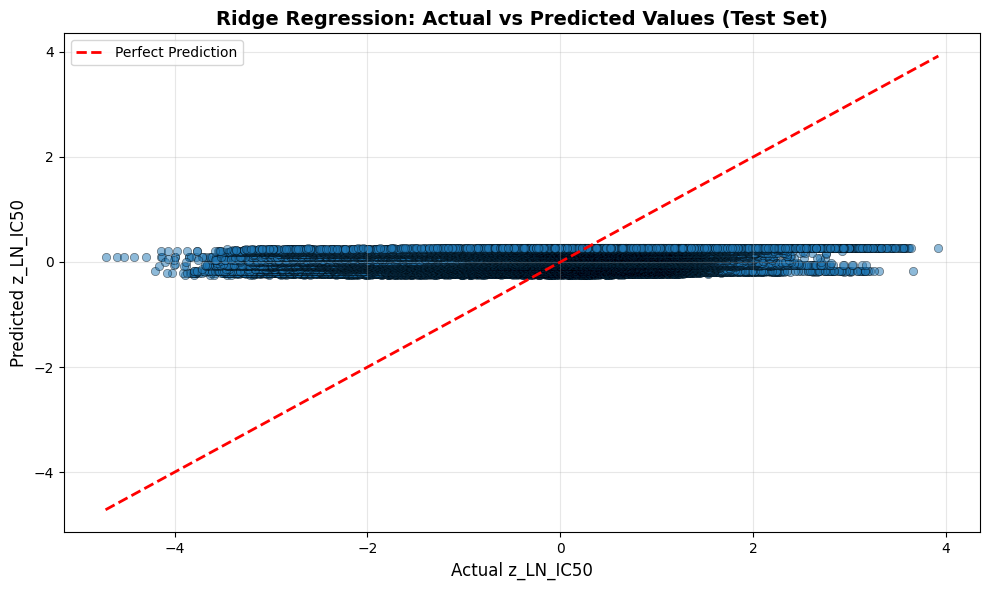


Residuals Statistics:
Mean Residual: -0.0243
Std Residual: 0.9971
Min Residual: -4.8194
Max Residual: 3.8273


In [64]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Use RidgeCV to find optimal alpha through cross-validation
alphas = np.logspace(-3, 3, 50)  # Test 50 alpha values from 0.001 to 1000
ridge_model = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_model.fit(X_train, y_train)

print(f"Best alpha selected by cross-validation: {ridge_model.alpha_:.4f}")

# Make predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Ridge Regression Model Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Create scatter plot of actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('Ridge Regression: Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
residuals = y_test - y_test_pred
print(f"\nResiduals Statistics:")
print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual: {residuals.std():.4f}")
print(f"Min Residual: {residuals.min():.4f}")
print(f"Max Residual: {residuals.max():.4f}")


### Random Forest and Hyper Parameter Tuning for z_LN_IC50

Performing Grid Search for Random Forest hyperparameters...
This may take a few minutes...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best parameters found:
  max_depth: 5
  n_estimators: 50

Best cross-validation RMSE: 1.3571

Best parameters found:
  max_depth: 5
  n_estimators: 50

Best cross-validation RMSE: 1.3571
Random Forest Model Performance:
Train RMSE: 0.9361
Test RMSE: 0.9458
Train R²: 0.1206
Test R²: 0.1179

Feature Importance:
     feature  importance
0    DRUG_ID    0.999542
1  COSMIC_ID    0.000458
Random Forest Model Performance:
Train RMSE: 0.9361
Test RMSE: 0.9458
Train R²: 0.1206
Test R²: 0.1179

Feature Importance:
     feature  importance
0    DRUG_ID    0.999542
1  COSMIC_ID    0.000458


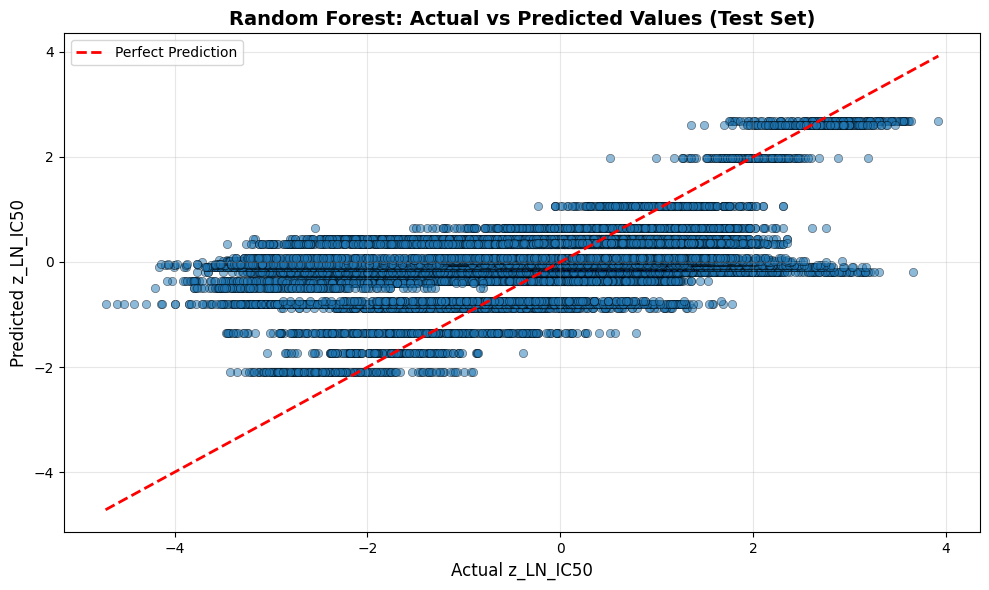


Residuals Statistics:
Mean Residual: -0.0083
Std Residual: 0.9458
Min Residual: -4.1039
Max Residual: 3.8465


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

# Create Random Forest model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with cross-validation
print("Performing Grid Search for Random Forest hyperparameters...")
print("This may take a few minutes...")

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# Use the best model
rf_model = grid_search.best_estimator_

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Performance:")
print(f"Train RMSE: {train_rmse_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Train R²: {train_r2_rf:.4f}")
print(f"Test R²: {test_r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['DRUG_ID', 'COSMIC_ID'],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(f"\nFeature Importance:")
print(feature_importance)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('Random Forest: Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
residuals_rf = y_test - y_test_pred_rf
print(f"\nResiduals Statistics:")
print(f"Mean Residual: {residuals_rf.mean():.4f}")
print(f"Std Residual: {residuals_rf.std():.4f}")
print(f"Min Residual: {residuals_rf.min():.4f}")
print(f"Max Residual: {residuals_rf.max():.4f}")

### XGBoost and Hyper Parameter Tuning for z_LN_IC50

Performing Grid Search for XGBoost hyperparameters...
This may take a few minutes...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters found:
  learning_rate: 0.01
  max_depth: 3
  n_estimators: 50

Best cross-validation RMSE: 1.0415

XGBoost Model Performance:
Train RMSE: 0.9763
Test RMSE: 0.9858
Train R²: 0.0434
Test R²: 0.0418

Feature Importance:
     feature  importance
0    DRUG_ID     0.99938
1  COSMIC_ID     0.00062

Best parameters found:
  learning_rate: 0.01
  max_depth: 3
  n_estimators: 50

Best cross-validation RMSE: 1.0415

XGBoost Model Performance:
Train RMSE: 0.9763
Test RMSE: 0.9858
Train R²: 0.0434
Test R²: 0.0418

Feature Importance:
     feature  importance
0    DRUG_ID     0.99938
1  COSMIC_ID     0.00062


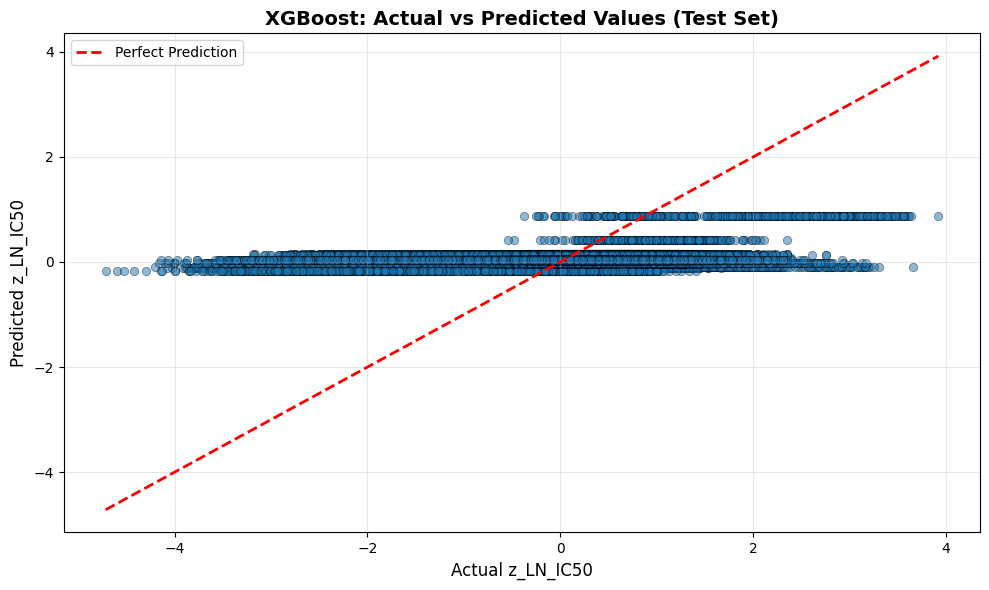


Residuals Statistics:
Mean Residual: -0.0094
Std Residual: 0.9857
Min Residual: -4.5397
Max Residual: 3.7473


In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create XGBoost model
xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with cross-validation
print("Performing Grid Search for XGBoost hyperparameters...")
print("This may take a few minutes...")

grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

# Print best parameters
print(f"\nBest parameters found:")
for param, value in grid_search_xgb.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation RMSE: {np.sqrt(-grid_search_xgb.best_score_):.4f}")

# Use the best model
xgb_model = grid_search_xgb.best_estimator_

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("\nXGBoost Model Performance:")
print(f"Train RMSE: {train_rmse_xgb:.4f}")
print(f"Test RMSE: {test_rmse_xgb:.4f}")
print(f"Train R²: {train_r2_xgb:.4f}")
print(f"Test R²: {test_r2_xgb:.4f}")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': ['DRUG_ID', 'COSMIC_ID'],
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)
print(f"\nFeature Importance:")
print(feature_importance_xgb)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('XGBoost: Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
residuals_xgb = y_test - y_test_pred_xgb
print(f"\nResiduals Statistics:")
print(f"Mean Residual: {residuals_xgb.mean():.4f}")
print(f"Std Residual: {residuals_xgb.std():.4f}")
print(f"Min Residual: {residuals_xgb.min():.4f}")
print(f"Max Residual: {residuals_xgb.max():.4f}")

### LightGBM and Hyper Parameter Tuning for z_LN_IC50

Performing Grid Search for LightGBM hyperparameters...
This may take a few minutes...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best parameters found:
  learning_rate: 0.01
  max_depth: 10
  n_estimators: 50
  num_leaves: 15

Best cross-validation RMSE: 1.0246

LightGBM Model Performance:
Train RMSE: 0.9527
Test RMSE: 0.9621
Train R²: 0.0892
Test R²: 0.0874

Feature Importance:
     feature  importance
0    DRUG_ID         700
1  COSMIC_ID           0

Best parameters found:
  learning_rate: 0.01
  max_depth: 10
  n_estimators: 50
  num_leaves: 15

Best cross-validation RMSE: 1.0246

LightGBM Model Performance:
Train RMSE: 0.9527
Test RMSE: 0.9621
Train R²: 0.0892
Test R²: 0.0874

Feature Importance:
     feature  importance
0    DRUG_ID         700
1  COSMIC_ID           0


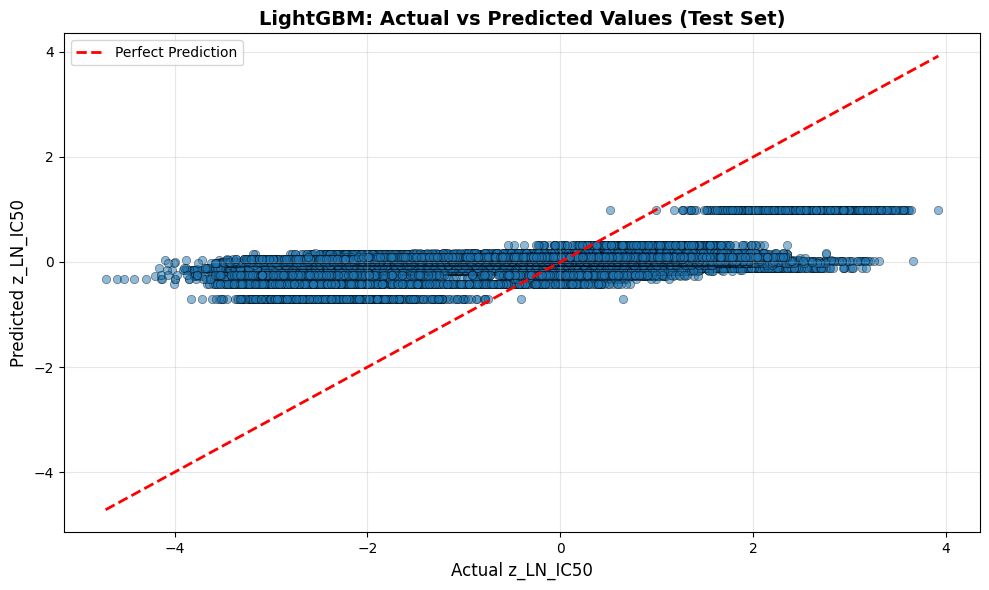


Residuals Statistics:
Mean Residual: -0.0094
Std Residual: 0.9620
Min Residual: -4.3852
Max Residual: 3.6266


In [67]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63]
}

# Create LightGBM model
lgbm_base = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)

# Perform Grid Search with cross-validation
print("Performing Grid Search for LightGBM hyperparameters...")
print("This may take a few minutes...")

grid_search_lgbm = GridSearchCV(
    estimator=lgbm_base,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_lgbm.fit(X_train, y_train)

# Print best parameters
print(f"\nBest parameters found:")
for param, value in grid_search_lgbm.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation RMSE: {np.sqrt(-grid_search_lgbm.best_score_):.4f}")

# Use the best model
lgbm_model = grid_search_lgbm.best_estimator_

# Make predictions
y_train_pred_lgbm = lgbm_model.predict(X_train)
y_test_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate model
train_rmse_lgbm = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm))
test_rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm))
train_r2_lgbm = r2_score(y_train, y_train_pred_lgbm)
test_r2_lgbm = r2_score(y_test, y_test_pred_lgbm)

print("\nLightGBM Model Performance:")
print(f"Train RMSE: {train_rmse_lgbm:.4f}")
print(f"Test RMSE: {test_rmse_lgbm:.4f}")
print(f"Train R²: {train_r2_lgbm:.4f}")
print(f"Test R²: {test_r2_lgbm:.4f}")

# Feature importance
feature_importance_lgbm = pd.DataFrame({
    'feature': ['DRUG_ID', 'COSMIC_ID'],
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)
print(f"\nFeature Importance:")
print(feature_importance_lgbm)

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lgbm, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('LightGBM: Actual vs Predicted Values (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print additional statistics
residuals_lgbm = y_test - y_test_pred_lgbm
print(f"\nResiduals Statistics:")
print(f"Mean Residual: {residuals_lgbm.mean():.4f}")
print(f"Std Residual: {residuals_lgbm.std():.4f}")
print(f"Min Residual: {residuals_lgbm.min():.4f}")
print(f"Max Residual: {residuals_lgbm.max():.4f}")

### Stacking Regressor for z_LN_IC50

Combining Random Forest, XGBoost, and LightGBM using Stacking with Ridge as meta-learner

Training Stacking Regressor for z_LN_IC50...
Base models: Random Forest, XGBoost, LightGBM
Meta-learner: Ridge Regression
This may take a few minutes...

Stacking Regressor Performance (z_LN_IC50):
Train RMSE: 0.9931, Test RMSE: 1.0022
Train R²: 0.0102, Test R²: 0.0096

Comparison with Base Models:
Random Forest:  Test RMSE: 0.9458, Test R²: 0.1179
XGBoost:        Test RMSE: 0.9858, Test R²: 0.0418
LightGBM:       Test RMSE: 0.9621, Test R²: 0.0874
Stacking:       Test RMSE: 1.0022, Test R²: 0.0096

Improvement over best base model: -5.96%

Stacking Regressor Performance (z_LN_IC50):
Train RMSE: 0.9931, Test RMSE: 1.0022
Train R²: 0.0102, Test R²: 0.0096

Comparison with Base Models:
Random Forest:  Test RMSE: 0.9458, Test R²: 0.1179
XGBoost:        Test RMSE: 0.9858, Test R²: 0.0418
LightGBM:       Test RMSE: 0.9621, Test R²: 0.0874
Stacking:       Test RMSE: 1.0022, Test R²: 0.0096

Improvement over best base model: -5.96%


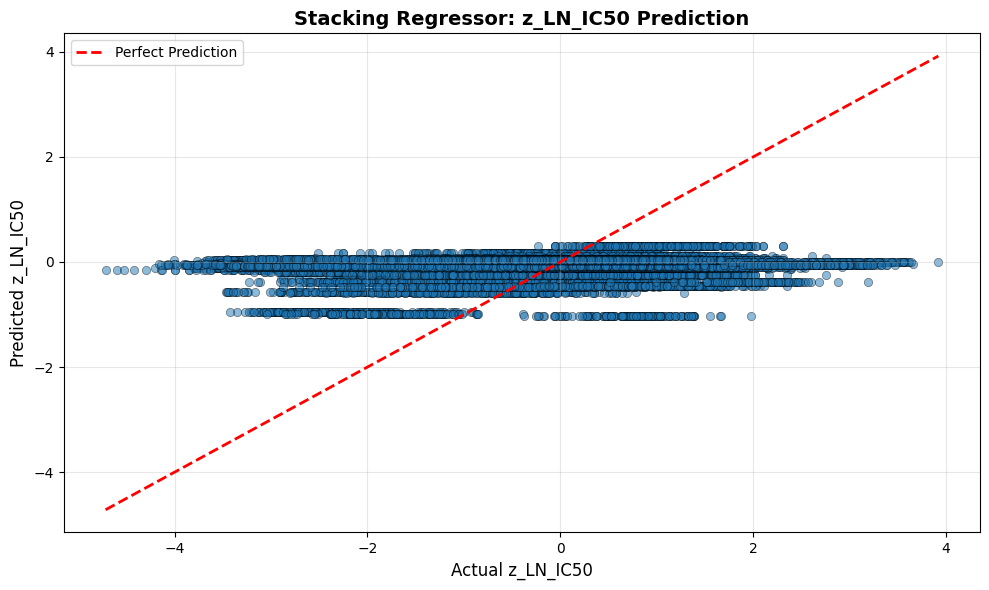

In [68]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models (using the trained models from earlier - excluding Ridge)
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]

# Create stacking regressor with Ridge as meta-learner
print("Training Stacking Regressor for z_LN_IC50...")
print("Base models: Random Forest, XGBoost, LightGBM")
print("Meta-learner: Ridge Regression")
print("This may take a few minutes...")

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0),
    cv=5,  # 5-fold cross-validation for meta-features
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)

# Make predictions
y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)

# Evaluate model
train_rmse_stack = np.sqrt(mean_squared_error(y_train, y_train_pred_stack))
test_rmse_stack = np.sqrt(mean_squared_error(y_test, y_test_pred_stack))
train_r2_stack = r2_score(y_train, y_train_pred_stack)
test_r2_stack = r2_score(y_test, y_test_pred_stack)

print("\nStacking Regressor Performance (z_LN_IC50):")
print(f"Train RMSE: {train_rmse_stack:.4f}, Test RMSE: {test_rmse_stack:.4f}")
print(f"Train R²: {train_r2_stack:.4f}, Test R²: {test_r2_stack:.4f}")

# Compare with individual models
print("\nComparison with Base Models:")
print(f"Random Forest:  Test RMSE: {test_rmse_rf:.4f}, Test R²: {test_r2_rf:.4f}")
print(f"XGBoost:        Test RMSE: {test_rmse_xgb:.4f}, Test R²: {test_r2_xgb:.4f}")
print(f"LightGBM:       Test RMSE: {test_rmse_lgbm:.4f}, Test R²: {test_r2_lgbm:.4f}")
print(f"Stacking:       Test RMSE: {test_rmse_stack:.4f}, Test R²: {test_r2_stack:.4f}")

# Calculate improvement
best_base_rmse = min(test_rmse_rf, test_rmse_xgb, test_rmse_lgbm)
improvement = ((best_base_rmse - test_rmse_stack) / best_base_rmse) * 100
print(f"\nImprovement over best base model: {improvement:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_stack, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_LN_IC50', fontsize=12)
plt.ylabel('Predicted z_LN_IC50', fontsize=12)
plt.title('Stacking Regressor: z_LN_IC50 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Training for z_AUC Prediction

Now we train all models to predict z_AUC instead of z_LN_IC50

### Data preparation for z_AUC prediction

In [69]:
# Prepare target variable for z_AUC prediction
y_train_auc = train_df_unseen_cell['z_AUC']
y_test_auc = test_df_unseen_cell['z_AUC']

print(f"Training samples: {len(y_train_auc)}")
print(f"Test samples: {len(y_test_auc)}")

Training samples: 460407
Test samples: 114790


### Ridge Regression and Hyper Parameter Tuning for z_AUC

Best alpha: 0.0010
Ridge Regression (z_AUC):
Train RMSE: 0.9903, Test RMSE: 1.0011
Train R²: 0.0149, Test R²: 0.0151


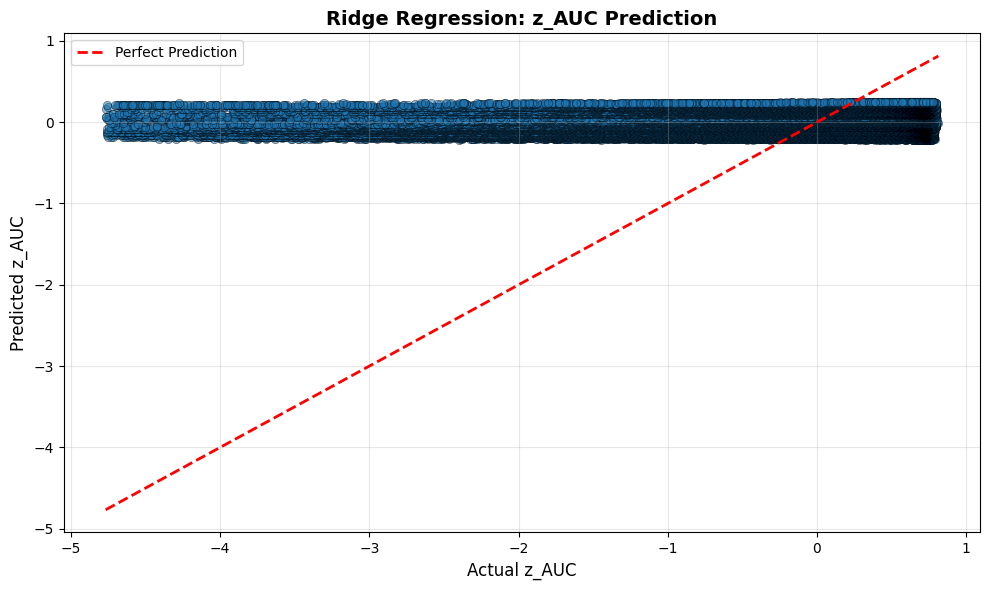

In [70]:
# Ridge Regression for z_AUC
alphas = np.logspace(-3, 3, 50)
ridge_model_auc = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_model_auc.fit(X_train, y_train_auc)

print(f"Best alpha: {ridge_model_auc.alpha_:.4f}")

y_train_pred_auc = ridge_model_auc.predict(X_train)
y_test_pred_auc = ridge_model_auc.predict(X_test)

train_rmse_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_auc))
test_rmse_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_auc))
train_r2_auc = r2_score(y_train_auc, y_train_pred_auc)
test_r2_auc = r2_score(y_test_auc, y_test_pred_auc)

print("Ridge Regression (z_AUC):")
print(f"Train RMSE: {train_rmse_auc:.4f}, Test RMSE: {test_rmse_auc:.4f}")
print(f"Train R²: {train_r2_auc:.4f}, Test R²: {test_r2_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('Ridge Regression: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Random Forest and Hyper Parameter Tuning for z_AUC

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 5, 'n_estimators': 200}
Best CV RMSE: 1.0192
Best params: {'max_depth': 5, 'n_estimators': 200}
Best CV RMSE: 1.0192
Random Forest (z_AUC):
Train RMSE: 0.9399, Test RMSE: 0.9505
Train R²: 0.1127, Test R²: 0.1122
Random Forest (z_AUC):
Train RMSE: 0.9399, Test RMSE: 0.9505
Train R²: 0.1127, Test R²: 0.1122


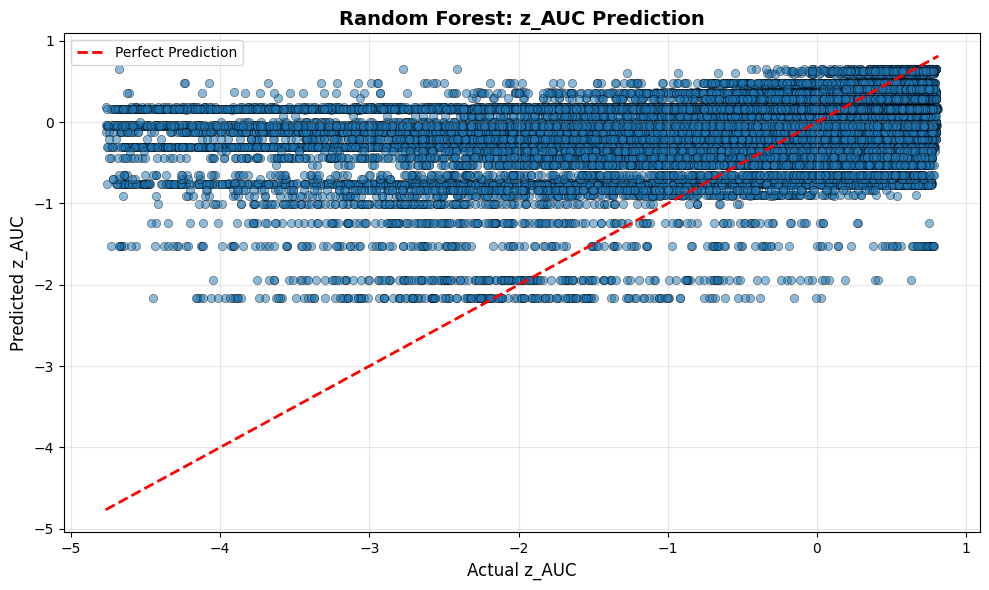

In [71]:
# Random Forest for z_AUC
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_auc = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_auc = GridSearchCV(rf_base_auc, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_auc.fit(X_train, y_train_auc)

print(f"Best params: {grid_search_rf_auc.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_auc.best_score_):.4f}")

rf_model_auc = grid_search_rf_auc.best_estimator_
y_train_pred_rf_auc = rf_model_auc.predict(X_train)
y_test_pred_rf_auc = rf_model_auc.predict(X_test)

train_rmse_rf_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_rf_auc))
test_rmse_rf_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_rf_auc))
train_r2_rf_auc = r2_score(y_train_auc, y_train_pred_rf_auc)
test_r2_rf_auc = r2_score(y_test_auc, y_test_pred_rf_auc)

print("Random Forest (z_AUC):")
print(f"Train RMSE: {train_rmse_rf_auc:.4f}, Test RMSE: {test_rmse_rf_auc:.4f}")
print(f"Train R²: {train_r2_rf_auc:.4f}, Test R²: {test_r2_rf_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_rf_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('Random Forest: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### XGBoost and Hyper Parameter Tuning for z_AUC

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 0.9854
XGBoost (z_AUC):
Train RMSE: 0.9142, Test RMSE: 0.9275
Train R²: 0.1606, Test R²: 0.1546
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 0.9854
XGBoost (z_AUC):
Train RMSE: 0.9142, Test RMSE: 0.9275
Train R²: 0.1606, Test R²: 0.1546


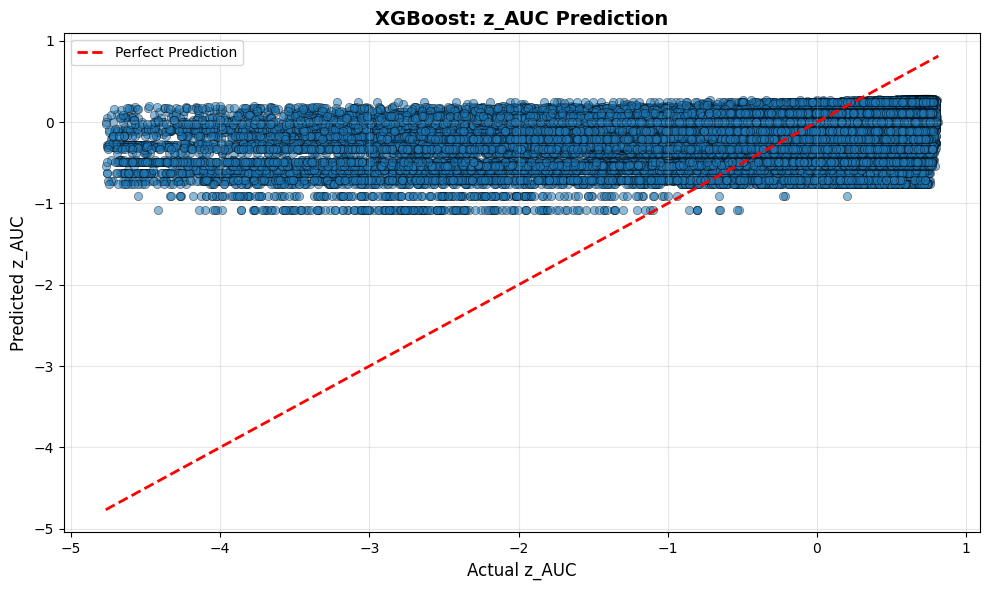

In [72]:
# XGBoost for z_AUC
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_base_auc = XGBRegressor(random_state=42, n_jobs=-1)
grid_search_xgb_auc = GridSearchCV(xgb_base_auc, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb_auc.fit(X_train, y_train_auc)

print(f"Best params: {grid_search_xgb_auc.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_xgb_auc.best_score_):.4f}")

xgb_model_auc = grid_search_xgb_auc.best_estimator_
y_train_pred_xgb_auc = xgb_model_auc.predict(X_train)
y_test_pred_xgb_auc = xgb_model_auc.predict(X_test)

train_rmse_xgb_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_xgb_auc))
test_rmse_xgb_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_xgb_auc))
train_r2_xgb_auc = r2_score(y_train_auc, y_train_pred_xgb_auc)
test_r2_xgb_auc = r2_score(y_test_auc, y_test_pred_xgb_auc)

print("XGBoost (z_AUC):")
print(f"Train RMSE: {train_rmse_xgb_auc:.4f}, Test RMSE: {test_rmse_xgb_auc:.4f}")
print(f"Train R²: {train_r2_xgb_auc:.4f}, Test R²: {test_r2_xgb_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_xgb_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('XGBoost: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### LightGBM and Hyper Paramete tuning for z_AUC

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 63}
Best CV RMSE: 0.9858
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 63}
Best CV RMSE: 0.9858
LightGBM (z_AUC):
Train RMSE: 0.9496, Test RMSE: 0.9621
Train R²: 0.0942, Test R²: 0.0904
LightGBM (z_AUC):
Train RMSE: 0.9496, Test RMSE: 0.9621
Train R²: 0.0942, Test R²: 0.0904


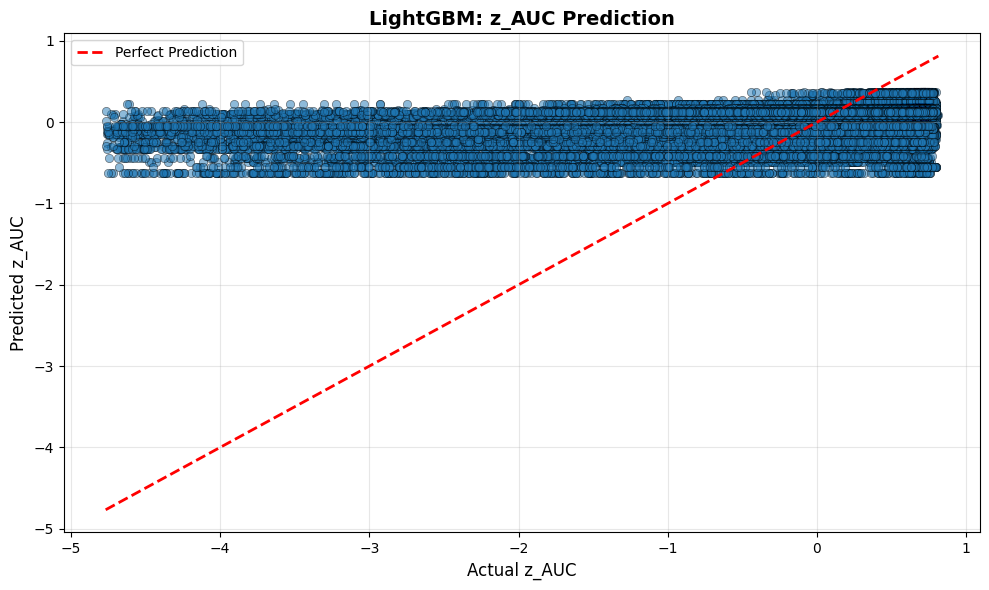

In [73]:
# LightGBM for z_AUC
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63]
}

lgbm_base_auc = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
grid_search_lgbm_auc = GridSearchCV(lgbm_base_auc, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_lgbm_auc.fit(X_train, y_train_auc)

print(f"Best params: {grid_search_lgbm_auc.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_lgbm_auc.best_score_):.4f}")

lgbm_model_auc = grid_search_lgbm_auc.best_estimator_
y_train_pred_lgbm_auc = lgbm_model_auc.predict(X_train)
y_test_pred_lgbm_auc = lgbm_model_auc.predict(X_test)

train_rmse_lgbm_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_lgbm_auc))
test_rmse_lgbm_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_lgbm_auc))
train_r2_lgbm_auc = r2_score(y_train_auc, y_train_pred_lgbm_auc)
test_r2_lgbm_auc = r2_score(y_test_auc, y_test_pred_lgbm_auc)

print("LightGBM (z_AUC):")
print(f"Train RMSE: {train_rmse_lgbm_auc:.4f}, Test RMSE: {test_rmse_lgbm_auc:.4f}")
print(f"Train R²: {train_r2_lgbm_auc:.4f}, Test R²: {test_r2_lgbm_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_lgbm_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('LightGBM: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Stacking Regressor for z_AUC

Combining Random Forest, XGBoost, and LightGBM using Stacking with Ridge as meta-learner

Training Stacking Regressor for z_AUC...
Base models: Random Forest, XGBoost, LightGBM
Meta-learner: Ridge Regression
This may take a few minutes...

Stacking Regressor Performance (z_AUC):
Train RMSE: 0.9518, Test RMSE: 0.9634
Train R²: 0.0901, Test R²: 0.0879

Comparison with Base Models:
Random Forest:  Test RMSE: 0.9505, Test R²: 0.1122
XGBoost:        Test RMSE: 0.9275, Test R²: 0.1546
LightGBM:       Test RMSE: 0.9621, Test R²: 0.0904
Stacking:       Test RMSE: 0.9634, Test R²: 0.0879

Improvement over best base model: -3.87%

Stacking Regressor Performance (z_AUC):
Train RMSE: 0.9518, Test RMSE: 0.9634
Train R²: 0.0901, Test R²: 0.0879

Comparison with Base Models:
Random Forest:  Test RMSE: 0.9505, Test R²: 0.1122
XGBoost:        Test RMSE: 0.9275, Test R²: 0.1546
LightGBM:       Test RMSE: 0.9621, Test R²: 0.0904
Stacking:       Test RMSE: 0.9634, Test R²: 0.0879

Improvement over best base model: -3.87%


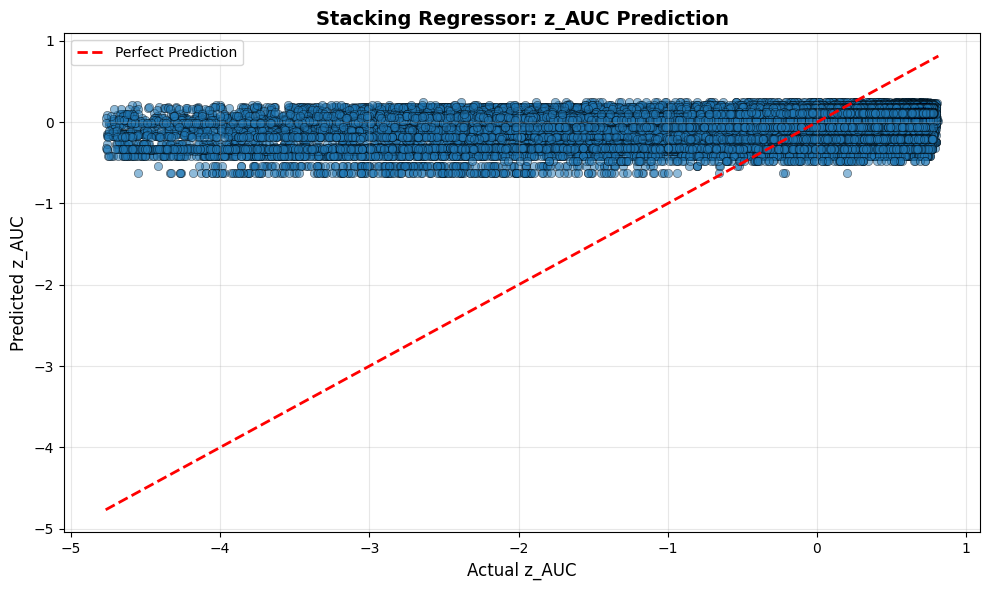

In [74]:
# Define base models for z_AUC (using the trained models from earlier)
estimators_auc = [
    ('rf', rf_model_auc),
    ('xgb', xgb_model_auc),
    ('lgbm', lgbm_model_auc)
]

# Create stacking regressor with Ridge as meta-learner
print("Training Stacking Regressor for z_AUC...")
print("Base models: Random Forest, XGBoost, LightGBM")
print("Meta-learner: Ridge Regression")
print("This may take a few minutes...")

stacking_model_auc = StackingRegressor(
    estimators=estimators_auc,
    final_estimator=Ridge(alpha=1.0),
    cv=5,  # 5-fold cross-validation for meta-features
    n_jobs=-1
)

stacking_model_auc.fit(X_train, y_train_auc)

# Make predictions
y_train_pred_stack_auc = stacking_model_auc.predict(X_train)
y_test_pred_stack_auc = stacking_model_auc.predict(X_test)

# Evaluate model
train_rmse_stack_auc = np.sqrt(mean_squared_error(y_train_auc, y_train_pred_stack_auc))
test_rmse_stack_auc = np.sqrt(mean_squared_error(y_test_auc, y_test_pred_stack_auc))
train_r2_stack_auc = r2_score(y_train_auc, y_train_pred_stack_auc)
test_r2_stack_auc = r2_score(y_test_auc, y_test_pred_stack_auc)

print("\nStacking Regressor Performance (z_AUC):")
print(f"Train RMSE: {train_rmse_stack_auc:.4f}, Test RMSE: {test_rmse_stack_auc:.4f}")
print(f"Train R²: {train_r2_stack_auc:.4f}, Test R²: {test_r2_stack_auc:.4f}")

# Compare with individual models
print("\nComparison with Base Models:")
print(f"Random Forest:  Test RMSE: {test_rmse_rf_auc:.4f}, Test R²: {test_r2_rf_auc:.4f}")
print(f"XGBoost:        Test RMSE: {test_rmse_xgb_auc:.4f}, Test R²: {test_r2_xgb_auc:.4f}")
print(f"LightGBM:       Test RMSE: {test_rmse_lgbm_auc:.4f}, Test R²: {test_r2_lgbm_auc:.4f}")
print(f"Stacking:       Test RMSE: {test_rmse_stack_auc:.4f}, Test R²: {test_r2_stack_auc:.4f}")

# Calculate improvement
best_base_rmse_auc = min(test_rmse_rf_auc, test_rmse_xgb_auc, test_rmse_lgbm_auc)
improvement_auc = ((best_base_rmse_auc - test_rmse_stack_auc) / best_base_rmse_auc) * 100
print(f"\nImprovement over best base model: {improvement_auc:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_auc, y_test_pred_stack_auc, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_auc.min(), y_test_auc.max()], [y_test_auc.min(), y_test_auc.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual z_AUC', fontsize=12)
plt.ylabel('Predicted z_AUC', fontsize=12)
plt.title('Stacking Regressor: z_AUC Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Training for y_weighted_0.25 Prediction

Now we train all models to predict y_weighted_0.25 (weighted combination: 0.25 * z_LN_IC50 + 0.75 * z_AUC)

### Data preparation for y_weighted_0.25 prediction

In [75]:
# Prepare target variable for y_weighted_0.25 prediction
y_train_weighted = train_df_unseen_cell['y_weighted_0.25']
y_test_weighted = test_df_unseen_cell['y_weighted_0.25']

print(f"Training samples: {len(y_train_weighted)}")
print(f"Test samples: {len(y_test_weighted)}")
print(f"\nTarget statistics:")
print(f"Mean: {y_train_weighted.mean():.4f}")
print(f"Std: {y_train_weighted.std():.4f}")

Training samples: 460407
Test samples: 114790

Target statistics:
Mean: 0.0030
Std: 0.9498


### Ridge Regression and Hyper parameter Tuning for y_weighted_0.25

Best alpha: 0.0010
Ridge Regression (y_weighted_0.25):
Train RMSE: 0.9416, Test RMSE: 0.9526
Train R²: 0.0173, Test R²: 0.0177


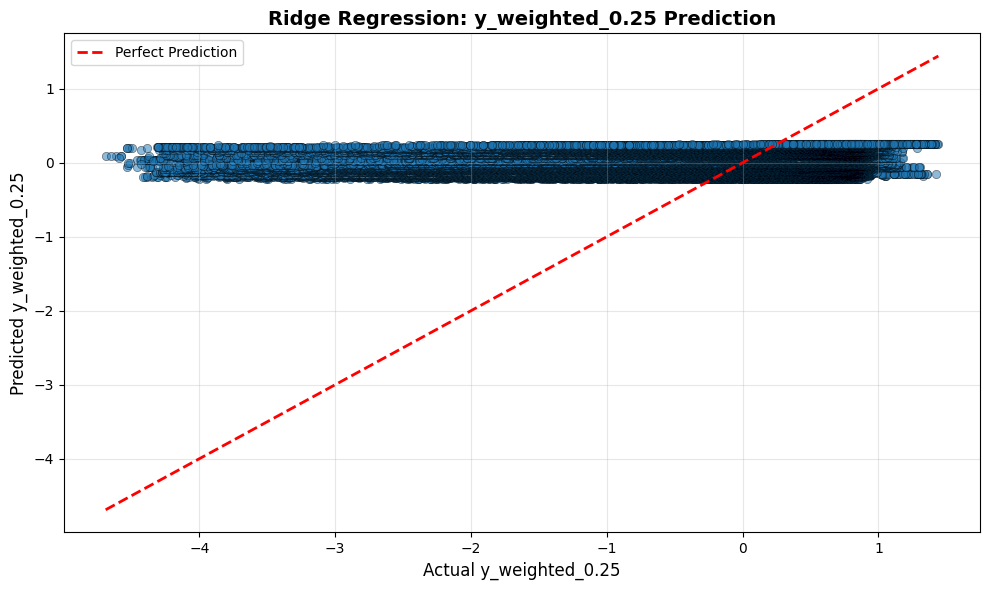

In [76]:
# Ridge Regression for y_weighted_0.25
alphas = np.logspace(-3, 3, 50)
ridge_model_weighted = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_model_weighted.fit(X_train, y_train_weighted)

print(f"Best alpha: {ridge_model_weighted.alpha_:.4f}")

y_train_pred_weighted = ridge_model_weighted.predict(X_train)
y_test_pred_weighted = ridge_model_weighted.predict(X_test)

train_rmse_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_weighted))
test_rmse_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_weighted))
train_r2_weighted = r2_score(y_train_weighted, y_train_pred_weighted)
test_r2_weighted = r2_score(y_test_weighted, y_test_pred_weighted)

print("Ridge Regression (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_weighted:.4f}, Test RMSE: {test_rmse_weighted:.4f}")
print(f"Train R²: {train_r2_weighted:.4f}, Test R²: {test_r2_weighted:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('Ridge Regression: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Random Forest and Hyper Parameter tuning for y_weighted_0.25

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 1.0092
Random Forest (y_weighted_0.25):
Train RMSE: 0.7752, Test RMSE: 0.7981
Train R²: 0.3338, Test R²: 0.3105
Best params: {'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 1.0092
Random Forest (y_weighted_0.25):
Train RMSE: 0.7752, Test RMSE: 0.7981
Train R²: 0.3338, Test R²: 0.3105


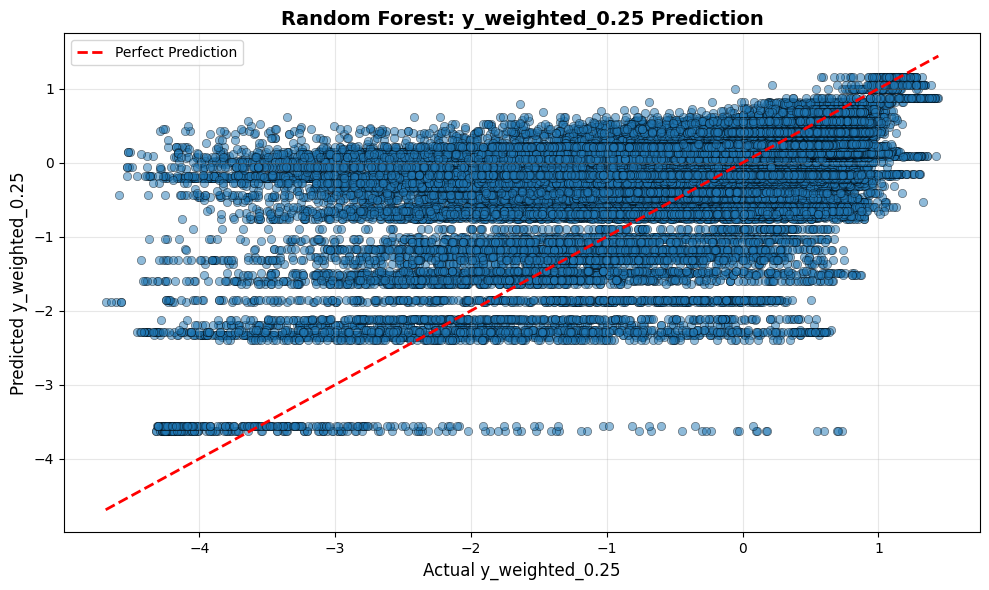

In [77]:
# Random Forest for y_weighted_0.25
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_weighted = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_weighted = GridSearchCV(rf_base_weighted, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_weighted.fit(X_train, y_train_weighted)

print(f"Best params: {grid_search_rf_weighted.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_weighted.best_score_):.4f}")

rf_model_weighted = grid_search_rf_weighted.best_estimator_
y_train_pred_rf_weighted = rf_model_weighted.predict(X_train)
y_test_pred_rf_weighted = rf_model_weighted.predict(X_test)

train_rmse_rf_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_rf_weighted))
test_rmse_rf_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_rf_weighted))
train_r2_rf_weighted = r2_score(y_train_weighted, y_train_pred_rf_weighted)
test_r2_rf_weighted = r2_score(y_test_weighted, y_test_pred_rf_weighted)

print("Random Forest (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_rf_weighted:.4f}, Test RMSE: {test_rmse_rf_weighted:.4f}")
print(f"Train R²: {train_r2_rf_weighted:.4f}, Test R²: {test_r2_rf_weighted:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_rf_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('Random Forest: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### XGBoost and Hyper Parameter Tuning for y_weighted_0.25

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Best CV RMSE: 0.9405
XGBoost (y_weighted_0.25):
Train RMSE: 0.8975, Test RMSE: 0.9108
Train R²: 0.1072, Test R²: 0.1021
Best params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Best CV RMSE: 0.9405
XGBoost (y_weighted_0.25):
Train RMSE: 0.8975, Test RMSE: 0.9108
Train R²: 0.1072, Test R²: 0.1021


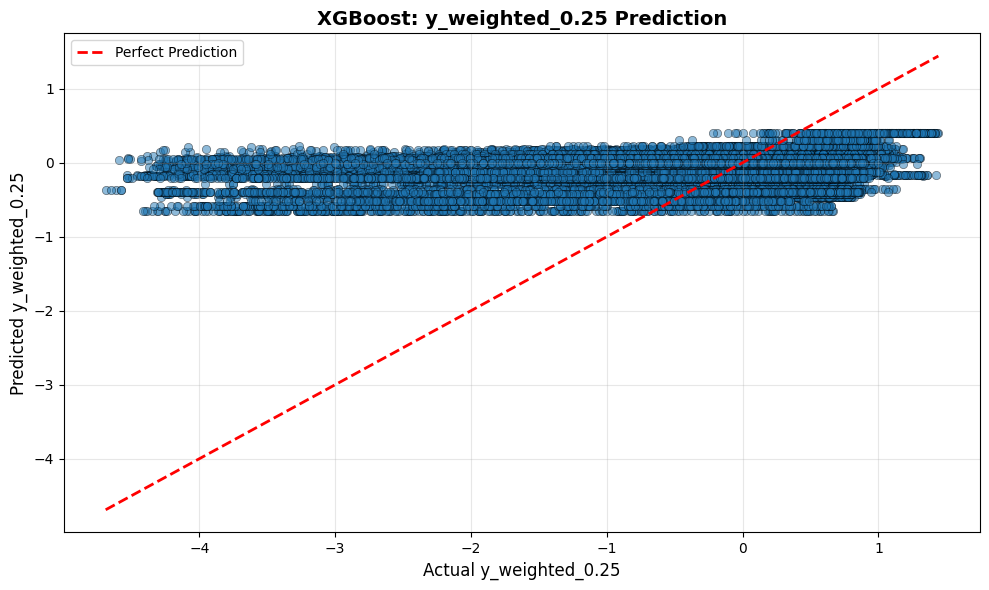

In [78]:
# XGBoost for y_weighted_0.25
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_base_weighted = XGBRegressor(random_state=42, n_jobs=-1)
grid_search_xgb_weighted = GridSearchCV(xgb_base_weighted, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb_weighted.fit(X_train, y_train_weighted)

print(f"Best params: {grid_search_xgb_weighted.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_xgb_weighted.best_score_):.4f}")

xgb_model_weighted = grid_search_xgb_weighted.best_estimator_
y_train_pred_xgb_weighted = xgb_model_weighted.predict(X_train)
y_test_pred_xgb_weighted = xgb_model_weighted.predict(X_test)

train_rmse_xgb_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_xgb_weighted))
test_rmse_xgb_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_xgb_weighted))
train_r2_xgb_weighted = r2_score(y_train_weighted, y_train_pred_xgb_weighted)
test_r2_xgb_weighted = r2_score(y_test_weighted, y_test_pred_xgb_weighted)

print("XGBoost (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_xgb_weighted:.4f}, Test RMSE: {test_rmse_xgb_weighted:.4f}")
print(f"Train R²: {train_r2_xgb_weighted:.4f}, Test R²: {test_r2_xgb_weighted:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_xgb_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('XGBoost: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### LightGBM and Hyper Parameter Tuning for y_weighted_0.25

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'num_leaves': 63}
Best CV RMSE: 0.9397
LightGBM (y_weighted_0.25):
Train RMSE: 0.8892, Test RMSE: 0.9016
Train R²: 0.1236, Test R²: 0.1201
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'num_leaves': 63}
Best CV RMSE: 0.9397
LightGBM (y_weighted_0.25):
Train RMSE: 0.8892, Test RMSE: 0.9016
Train R²: 0.1236, Test R²: 0.1201


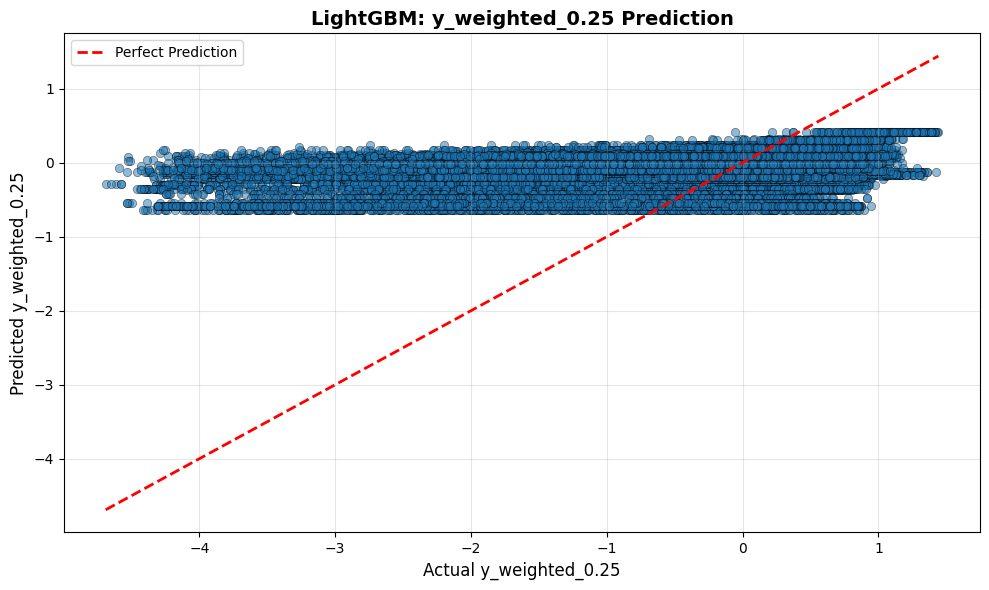

In [79]:
# LightGBM for y_weighted_0.25
from lightgbm import LGBMRegressor

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63]
}

lgbm_base_weighted = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
grid_search_lgbm_weighted = GridSearchCV(lgbm_base_weighted, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_lgbm_weighted.fit(X_train, y_train_weighted)

print(f"Best params: {grid_search_lgbm_weighted.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_lgbm_weighted.best_score_):.4f}")

lgbm_model_weighted = grid_search_lgbm_weighted.best_estimator_
y_train_pred_lgbm_weighted = lgbm_model_weighted.predict(X_train)
y_test_pred_lgbm_weighted = lgbm_model_weighted.predict(X_test)

train_rmse_lgbm_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_lgbm_weighted))
test_rmse_lgbm_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_lgbm_weighted))
train_r2_lgbm_weighted = r2_score(y_train_weighted, y_train_pred_lgbm_weighted)
test_r2_lgbm_weighted = r2_score(y_test_weighted, y_test_pred_lgbm_weighted)

print("LightGBM (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_lgbm_weighted:.4f}, Test RMSE: {test_rmse_lgbm_weighted:.4f}")
print(f"Train R²: {train_r2_lgbm_weighted:.4f}, Test R²: {test_r2_lgbm_weighted:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_lgbm_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('LightGBM: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Stacking Regressor for y_weighted_0.25

Combining Random Forest, XGBoost, and LightGBM using Stacking with Ridge as meta-learner

Training Stacking Regressor for y_weighted_0.25...
Base models: Random Forest, XGBoost, LightGBM
Meta-learner: Ridge Regression
This may take a few minutes...

Stacking Regressor Performance (y_weighted_0.25):
Train RMSE: 0.8563, Test RMSE: 0.8686
Train R²: 0.1872, Test R²: 0.1833

Comparison with Base Models:
Random Forest:  Test RMSE: 0.7981, Test R²: 0.3105
XGBoost:        Test RMSE: 0.9108, Test R²: 0.1021
LightGBM:       Test RMSE: 0.9016, Test R²: 0.1201
Stacking:       Test RMSE: 0.8686, Test R²: 0.1833

Improvement over best base model: -8.83%

Stacking Regressor Performance (y_weighted_0.25):
Train RMSE: 0.8563, Test RMSE: 0.8686
Train R²: 0.1872, Test R²: 0.1833

Comparison with Base Models:
Random Forest:  Test RMSE: 0.7981, Test R²: 0.3105
XGBoost:        Test RMSE: 0.9108, Test R²: 0.1021
LightGBM:       Test RMSE: 0.9016, Test R²: 0.1201
Stacking:       Test RMSE: 0.8686, Test R²: 0.1833

Improvement over best base model: -8.83%


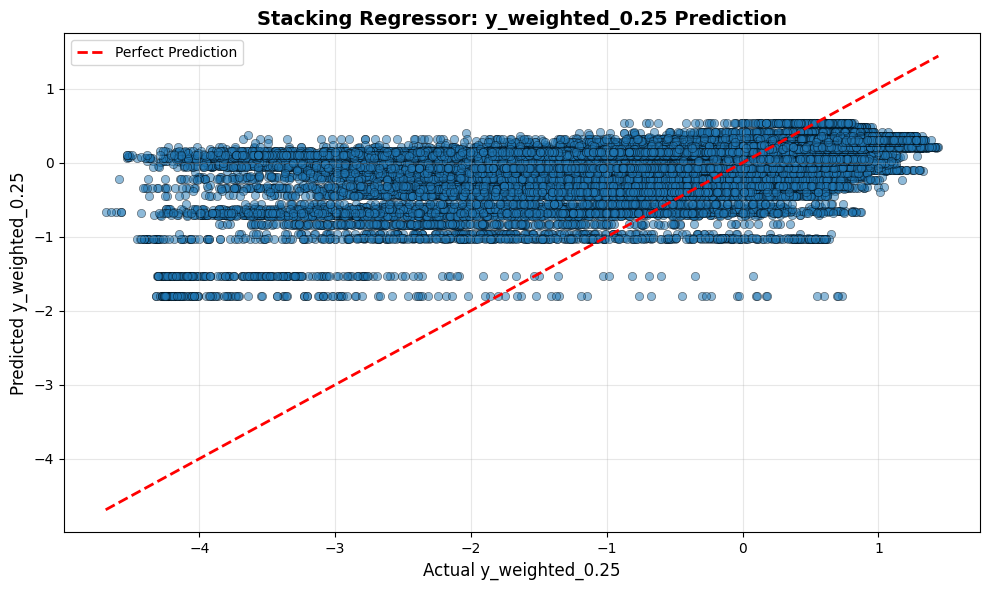

In [80]:
# Define base models for y_weighted_0.25 (using the trained models from earlier)
estimators_weighted = [
    ('rf', rf_model_weighted),
    ('xgb', xgb_model_weighted),
    ('lgbm', lgbm_model_weighted)
]

# Create stacking regressor with Ridge as meta-learner
print("Training Stacking Regressor for y_weighted_0.25...")
print("Base models: Random Forest, XGBoost, LightGBM")
print("Meta-learner: Ridge Regression")
print("This may take a few minutes...")

stacking_model_weighted = StackingRegressor(
    estimators=estimators_weighted,
    final_estimator=Ridge(alpha=1.0),
    cv=5,  # 5-fold cross-validation for meta-features
    n_jobs=-1
)

stacking_model_weighted.fit(X_train, y_train_weighted)

# Make predictions
y_train_pred_stack_weighted = stacking_model_weighted.predict(X_train)
y_test_pred_stack_weighted = stacking_model_weighted.predict(X_test)

# Evaluate model
train_rmse_stack_weighted = np.sqrt(mean_squared_error(y_train_weighted, y_train_pred_stack_weighted))
test_rmse_stack_weighted = np.sqrt(mean_squared_error(y_test_weighted, y_test_pred_stack_weighted))
train_r2_stack_weighted = r2_score(y_train_weighted, y_train_pred_stack_weighted)
test_r2_stack_weighted = r2_score(y_test_weighted, y_test_pred_stack_weighted)

print("\nStacking Regressor Performance (y_weighted_0.25):")
print(f"Train RMSE: {train_rmse_stack_weighted:.4f}, Test RMSE: {test_rmse_stack_weighted:.4f}")
print(f"Train R²: {train_r2_stack_weighted:.4f}, Test R²: {test_r2_stack_weighted:.4f}")

# Compare with individual models
print("\nComparison with Base Models:")
print(f"Random Forest:  Test RMSE: {test_rmse_rf_weighted:.4f}, Test R²: {test_r2_rf_weighted:.4f}")
print(f"XGBoost:        Test RMSE: {test_rmse_xgb_weighted:.4f}, Test R²: {test_r2_xgb_weighted:.4f}")
print(f"LightGBM:       Test RMSE: {test_rmse_lgbm_weighted:.4f}, Test R²: {test_r2_lgbm_weighted:.4f}")
print(f"Stacking:       Test RMSE: {test_rmse_stack_weighted:.4f}, Test R²: {test_r2_stack_weighted:.4f}")

# Calculate improvement
best_base_rmse_weighted = min(test_rmse_rf_weighted, test_rmse_xgb_weighted, test_rmse_lgbm_weighted)
improvement_weighted = ((best_base_rmse_weighted - test_rmse_stack_weighted) / best_base_rmse_weighted) * 100
print(f"\nImprovement over best base model: {improvement_weighted:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_weighted, y_test_pred_stack_weighted, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_weighted.min(), y_test_weighted.max()], [y_test_weighted.min(), y_test_weighted.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual y_weighted_0.25', fontsize=12)
plt.ylabel('Predicted y_weighted_0.25', fontsize=12)
plt.title('Stacking Regressor: y_weighted_0.25 Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Training for Sensitivity Prediction

Now we train all models to predict sensitivity (average of z_IC50_sens and z_AUC)

### Data preparation for sensitivity prediction

In [81]:
# Prepare target variable for sensitivity prediction
y_train_sens = train_df_unseen_cell['sensitivity']
y_test_sens = test_df_unseen_cell['sensitivity']

print(f"Training samples: {len(y_train_sens)}")
print(f"Test samples: {len(y_test_sens)}")
print(f"\nTarget statistics:")
print(f"Mean: {y_train_sens.mean():.4f}")
print(f"Std: {y_train_sens.std():.4f}")

Training samples: 460407
Test samples: 114790

Target statistics:
Mean: 0.0027
Std: 0.9334


### Ridge Regression and Hyper Parameter Tuning for sensitivity

Best alpha: 1000.0000
Ridge Regression (sensitivity):
Train RMSE: 0.9245, Test RMSE: 0.9352
Train R²: 0.0189, Test R²: 0.0194


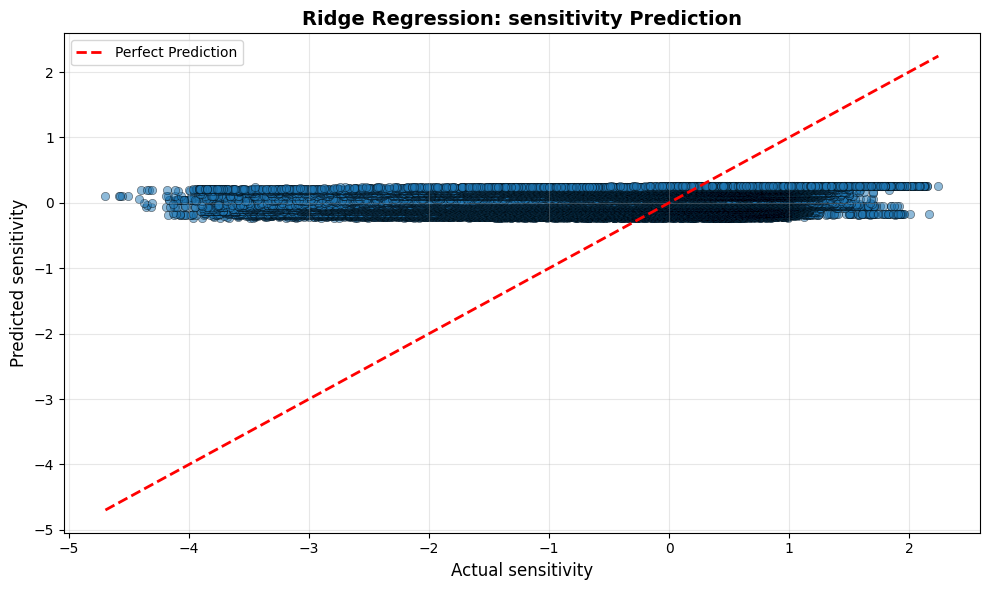

In [82]:
# Ridge Regression for sensitivity
alphas = np.logspace(-3, 3, 50)
ridge_model_sens = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_model_sens.fit(X_train, y_train_sens)

print(f"Best alpha: {ridge_model_sens.alpha_:.4f}")

y_train_pred_sens = ridge_model_sens.predict(X_train)
y_test_pred_sens = ridge_model_sens.predict(X_test)

train_rmse_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_sens))
test_rmse_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_sens))
train_r2_sens = r2_score(y_train_sens, y_train_pred_sens)
test_r2_sens = r2_score(y_test_sens, y_test_pred_sens)

print("Ridge Regression (sensitivity):")
print(f"Train RMSE: {train_rmse_sens:.4f}, Test RMSE: {test_rmse_sens:.4f}")
print(f"Train R²: {train_r2_sens:.4f}, Test R²: {test_r2_sens:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('Ridge Regression: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Random Forest and Hyper Parameter Tuning for sensitivity

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 1.0726
Random Forest (sensitivity):
Train RMSE: 0.6992, Test RMSE: 0.7193
Train R²: 0.4389, Test R²: 0.4199
Best params: {'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 1.0726
Random Forest (sensitivity):
Train RMSE: 0.6992, Test RMSE: 0.7193
Train R²: 0.4389, Test R²: 0.4199


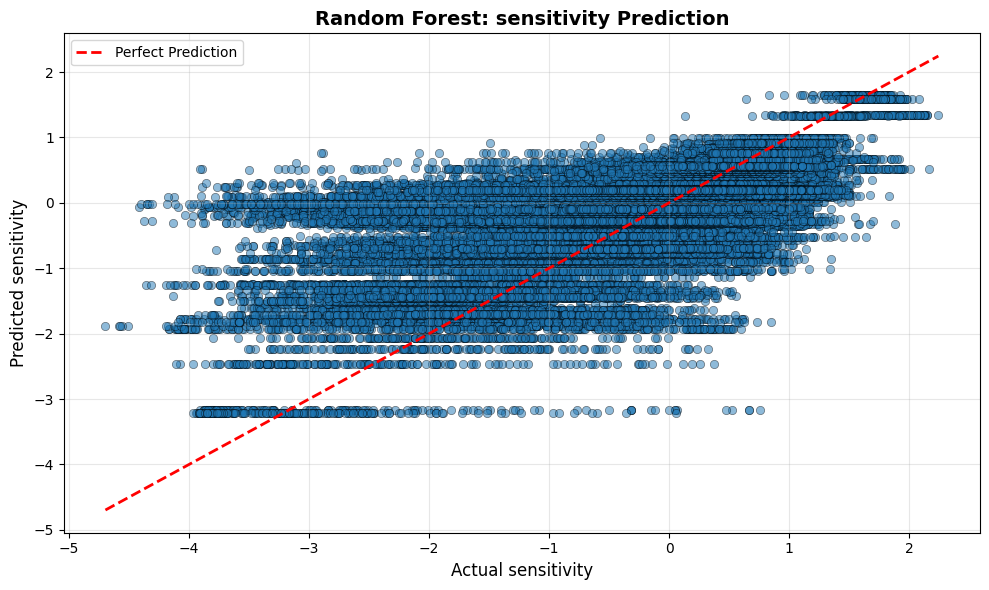

In [83]:
# Random Forest for sensitivity
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

rf_base_sens = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf_sens = GridSearchCV(rf_base_sens, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf_sens.fit(X_train, y_train_sens)

print(f"Best params: {grid_search_rf_sens.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_rf_sens.best_score_):.4f}")

rf_model_sens = grid_search_rf_sens.best_estimator_
y_train_pred_rf_sens = rf_model_sens.predict(X_train)
y_test_pred_rf_sens = rf_model_sens.predict(X_test)

train_rmse_rf_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_rf_sens))
test_rmse_rf_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_rf_sens))
train_r2_rf_sens = r2_score(y_train_sens, y_train_pred_rf_sens)
test_r2_rf_sens = r2_score(y_test_sens, y_test_pred_rf_sens)

print("Random Forest (sensitivity):")
print(f"Train RMSE: {train_rmse_rf_sens:.4f}, Test RMSE: {test_rmse_rf_sens:.4f}")
print(f"Train R²: {train_r2_rf_sens:.4f}, Test R²: {test_r2_rf_sens:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_rf_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('Random Forest: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### XGBoost and Hyper Parameter Tuning for sensitivity

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 0.9365
XGBoost (sensitivity):
Train RMSE: 0.8611, Test RMSE: 0.8734
Train R²: 0.1488, Test R²: 0.1447
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}
Best CV RMSE: 0.9365
XGBoost (sensitivity):
Train RMSE: 0.8611, Test RMSE: 0.8734
Train R²: 0.1488, Test R²: 0.1447


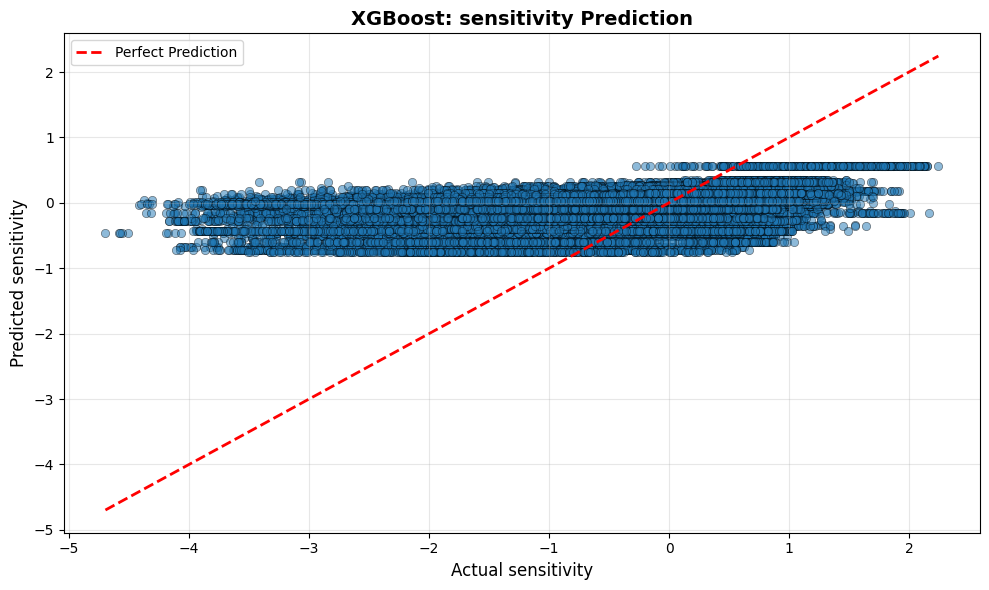

In [84]:
# XGBoost for sensitivity
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_base_sens = XGBRegressor(random_state=42, n_jobs=-1)
grid_search_xgb_sens = GridSearchCV(xgb_base_sens, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb_sens.fit(X_train, y_train_sens)

print(f"Best params: {grid_search_xgb_sens.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_xgb_sens.best_score_):.4f}")

xgb_model_sens = grid_search_xgb_sens.best_estimator_
y_train_pred_xgb_sens = xgb_model_sens.predict(X_train)
y_test_pred_xgb_sens = xgb_model_sens.predict(X_test)

train_rmse_xgb_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_xgb_sens))
test_rmse_xgb_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_xgb_sens))
train_r2_xgb_sens = r2_score(y_train_sens, y_train_pred_xgb_sens)
test_r2_xgb_sens = r2_score(y_test_sens, y_test_pred_xgb_sens)

print("XGBoost (sensitivity):")
print(f"Train RMSE: {train_rmse_xgb_sens:.4f}, Test RMSE: {test_rmse_xgb_sens:.4f}")
print(f"Train R²: {train_r2_xgb_sens:.4f}, Test R²: {test_r2_xgb_sens:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_xgb_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('XGBoost: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### LightGBM and Hyper Parameter Tuning for sensitivity

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'num_leaves': 31}
Best CV RMSE: 0.9303
LightGBM (sensitivity):
Train RMSE: 0.8863, Test RMSE: 0.8978
Train R²: 0.0982, Test R²: 0.0962
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50, 'num_leaves': 31}
Best CV RMSE: 0.9303
LightGBM (sensitivity):
Train RMSE: 0.8863, Test RMSE: 0.8978
Train R²: 0.0982, Test R²: 0.0962


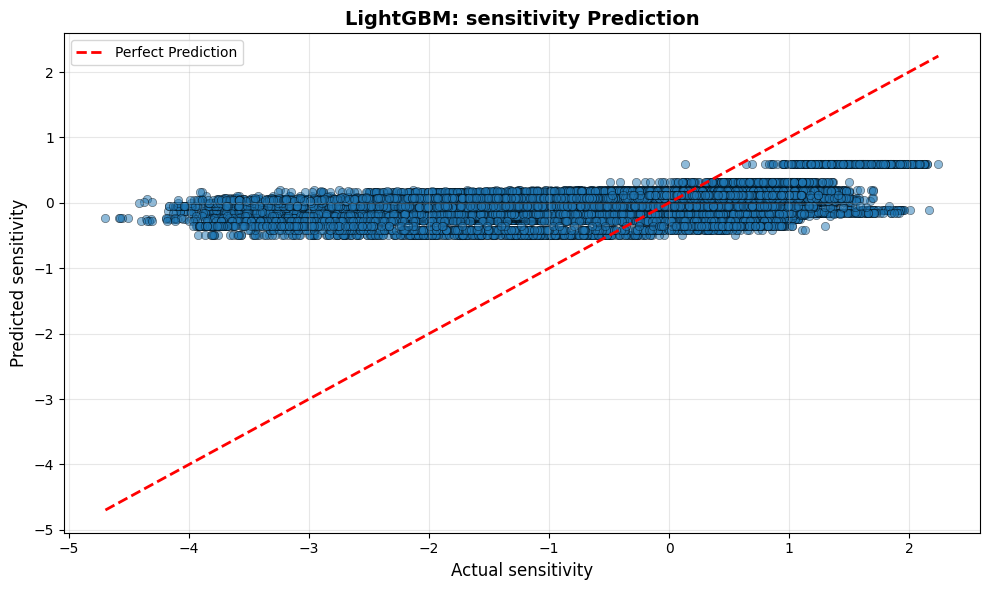

In [85]:
# LightGBM for sensitivity
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [15, 31, 63]
}

lgbm_base_sens = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
grid_search_lgbm_sens = GridSearchCV(lgbm_base_sens, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_lgbm_sens.fit(X_train, y_train_sens)

print(f"Best params: {grid_search_lgbm_sens.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search_lgbm_sens.best_score_):.4f}")

lgbm_model_sens = grid_search_lgbm_sens.best_estimator_
y_train_pred_lgbm_sens = lgbm_model_sens.predict(X_train)
y_test_pred_lgbm_sens = lgbm_model_sens.predict(X_test)

train_rmse_lgbm_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_lgbm_sens))
test_rmse_lgbm_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_lgbm_sens))
train_r2_lgbm_sens = r2_score(y_train_sens, y_train_pred_lgbm_sens)
test_r2_lgbm_sens = r2_score(y_test_sens, y_test_pred_lgbm_sens)

print("LightGBM (sensitivity):")
print(f"Train RMSE: {train_rmse_lgbm_sens:.4f}, Test RMSE: {test_rmse_lgbm_sens:.4f}")
print(f"Train R²: {train_r2_lgbm_sens:.4f}, Test R²: {test_r2_lgbm_sens:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_lgbm_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('LightGBM: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Stacking Regressor for sensitivity

Combining Random Forest, XGBoost, and LightGBM using Stacking with Ridge as meta-learner

Training Stacking Regressor for sensitivity...
Base models: Random Forest, XGBoost, LightGBM
Meta-learner: Ridge Regression
This may take a few minutes...

Stacking Regressor Performance (sensitivity):
Train RMSE: 0.8052, Test RMSE: 0.8201
Train R²: 0.2558, Test R²: 0.2459

Comparison with Base Models:
Random Forest:  Test RMSE: 0.7193, Test R²: 0.4199
XGBoost:        Test RMSE: 0.8734, Test R²: 0.1447
LightGBM:       Test RMSE: 0.8978, Test R²: 0.0962
Stacking:       Test RMSE: 0.8201, Test R²: 0.2459

Improvement over best base model: -14.02%

Stacking Regressor Performance (sensitivity):
Train RMSE: 0.8052, Test RMSE: 0.8201
Train R²: 0.2558, Test R²: 0.2459

Comparison with Base Models:
Random Forest:  Test RMSE: 0.7193, Test R²: 0.4199
XGBoost:        Test RMSE: 0.8734, Test R²: 0.1447
LightGBM:       Test RMSE: 0.8978, Test R²: 0.0962
Stacking:       Test RMSE: 0.8201, Test R²: 0.2459

Improvement over best base model: -14.02%


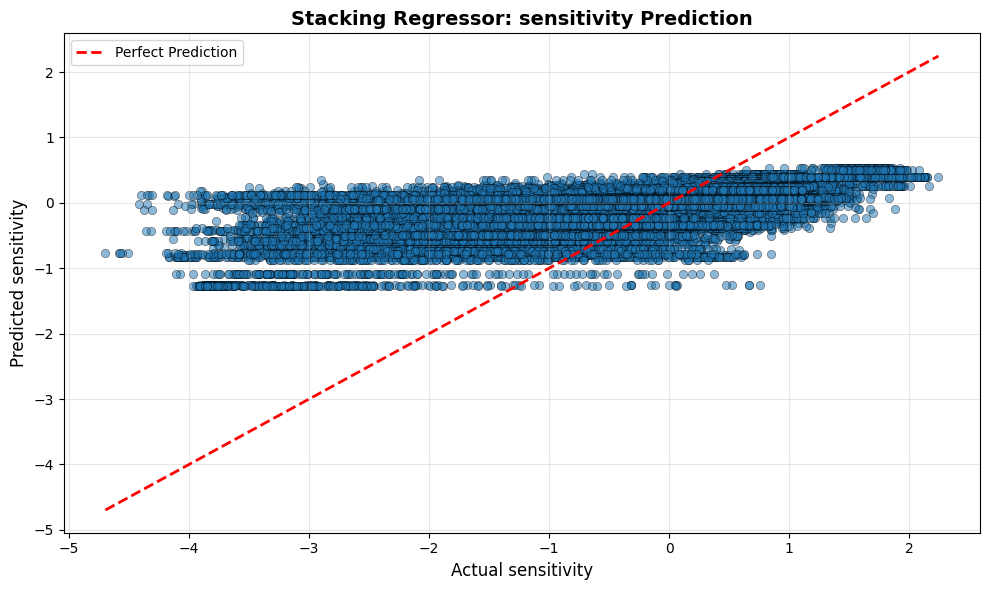

In [86]:
# Define base models for sensitivity (using the trained models from earlier)
estimators_sens = [
    ('rf', rf_model_sens),
    ('xgb', xgb_model_sens),
    ('lgbm', lgbm_model_sens)
]

# Create stacking regressor with Ridge as meta-learner
print("Training Stacking Regressor for sensitivity...")
print("Base models: Random Forest, XGBoost, LightGBM")
print("Meta-learner: Ridge Regression")
print("This may take a few minutes...")

stacking_model_sens = StackingRegressor(
    estimators=estimators_sens,
    final_estimator=Ridge(alpha=1.0),
    cv=5,  # 5-fold cross-validation for meta-features
    n_jobs=-1
)

stacking_model_sens.fit(X_train, y_train_sens)

# Make predictions
y_train_pred_stack_sens = stacking_model_sens.predict(X_train)
y_test_pred_stack_sens = stacking_model_sens.predict(X_test)

# Evaluate model
train_rmse_stack_sens = np.sqrt(mean_squared_error(y_train_sens, y_train_pred_stack_sens))
test_rmse_stack_sens = np.sqrt(mean_squared_error(y_test_sens, y_test_pred_stack_sens))
train_r2_stack_sens = r2_score(y_train_sens, y_train_pred_stack_sens)
test_r2_stack_sens = r2_score(y_test_sens, y_test_pred_stack_sens)

print("\nStacking Regressor Performance (sensitivity):")
print(f"Train RMSE: {train_rmse_stack_sens:.4f}, Test RMSE: {test_rmse_stack_sens:.4f}")
print(f"Train R²: {train_r2_stack_sens:.4f}, Test R²: {test_r2_stack_sens:.4f}")

# Compare with individual models
print("\nComparison with Base Models:")
print(f"Random Forest:  Test RMSE: {test_rmse_rf_sens:.4f}, Test R²: {test_r2_rf_sens:.4f}")
print(f"XGBoost:        Test RMSE: {test_rmse_xgb_sens:.4f}, Test R²: {test_r2_xgb_sens:.4f}")
print(f"LightGBM:       Test RMSE: {test_rmse_lgbm_sens:.4f}, Test R²: {test_r2_lgbm_sens:.4f}")
print(f"Stacking:       Test RMSE: {test_rmse_stack_sens:.4f}, Test R²: {test_r2_stack_sens:.4f}")

# Calculate improvement
best_base_rmse_sens = min(test_rmse_rf_sens, test_rmse_xgb_sens, test_rmse_lgbm_sens)
improvement_sens = ((best_base_rmse_sens - test_rmse_stack_sens) / best_base_rmse_sens) * 100
print(f"\nImprovement over best base model: {improvement_sens:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sens, y_test_pred_stack_sens, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_sens.min(), y_test_sens.max()], [y_test_sens.min(), y_test_sens.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual sensitivity', fontsize=12)
plt.ylabel('Predicted sensitivity', fontsize=12)
plt.title('Stacking Regressor: sensitivity Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Model Performance Summary

Comparison of all models for both z_LN_IC50 and z_AUC prediction

In [93]:
# Create comprehensive summary table
summary_data = {
    'Model': ['Ridge Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Stacking (RF+XGB+LGBM)'] * 4,
    'Target': ['z_LN_IC50'] * 5 + ['z_AUC'] * 5 + ['y_weighted_0.25'] * 5 + ['sensitivity'] * 5,
    'Train RMSE': [
        train_rmse, train_rmse_rf, train_rmse_xgb, train_rmse_lgbm, train_rmse_stack,
        train_rmse_auc, train_rmse_rf_auc, train_rmse_xgb_auc, train_rmse_lgbm_auc, train_rmse_stack_auc,
        train_rmse_weighted, train_rmse_rf_weighted, train_rmse_xgb_weighted, train_rmse_lgbm_weighted, train_rmse_stack_weighted,
        train_rmse_sens, train_rmse_rf_sens, train_rmse_xgb_sens, train_rmse_lgbm_sens, train_rmse_stack_sens
    ],
    'Test RMSE': [
        test_rmse, test_rmse_rf, test_rmse_xgb, test_rmse_lgbm, test_rmse_stack,
        test_rmse_auc, test_rmse_rf_auc, test_rmse_xgb_auc, test_rmse_lgbm_auc, test_rmse_stack_auc,
        test_rmse_weighted, test_rmse_rf_weighted, test_rmse_xgb_weighted, test_rmse_lgbm_weighted, test_rmse_stack_weighted,
        test_rmse_sens, test_rmse_rf_sens, test_rmse_xgb_sens, test_rmse_lgbm_sens, test_rmse_stack_sens
    ],
    'Train R²': [
        train_r2, train_r2_rf, train_r2_xgb, train_r2_lgbm, train_r2_stack,
        train_r2_auc, train_r2_rf_auc, train_r2_xgb_auc, train_r2_lgbm_auc, train_r2_stack_auc,
        train_r2_weighted, train_r2_rf_weighted, train_r2_xgb_weighted, train_r2_lgbm_weighted, train_r2_stack_weighted,
        train_r2_sens, train_r2_rf_sens, train_r2_xgb_sens, train_r2_lgbm_sens, train_r2_stack_sens
    ],
    'Test R²': [
        test_r2, test_r2_rf, test_r2_xgb, test_r2_lgbm, test_r2_stack,
        test_r2_auc, test_r2_rf_auc, test_r2_xgb_auc, test_r2_lgbm_auc, test_r2_stack_auc,
        test_r2_weighted, test_r2_rf_weighted, test_r2_xgb_weighted, test_r2_lgbm_weighted, test_r2_stack_weighted,
        test_r2_sens, test_r2_rf_sens, test_r2_xgb_sens, test_r2_lgbm_sens, test_r2_stack_sens
    ]
}

summary_df = pd.DataFrame(summary_data)

# Round values for better readability
summary_df['Train RMSE'] = summary_df['Train RMSE'].round(4)
summary_df['Test RMSE'] = summary_df['Test RMSE'].round(4)
summary_df['Train R²'] = summary_df['Train R²'].round(4)
summary_df['Test R²'] = summary_df['Test R²'].round(4)

print("=" * 80)
print("MODEL PERFORMANCE SUMMARY - Unseen Cell Lines Split")
print("=" * 80)
print()

# Display for z_LN_IC50
print("Predictions for z_LN_IC50:")
print("-" * 80)
print(summary_df[summary_df['Target'] == 'z_LN_IC50'].to_string(index=False))
print()

# Display for z_AUC
print("Predictions for z_AUC:")
print("-" * 80)
print(summary_df[summary_df['Target'] == 'z_AUC'].to_string(index=False))
print()

# Display for y_weighted_0.25
print("Predictions for y_weighted_0.25:")
print("-" * 80)
print(summary_df[summary_df['Target'] == 'y_weighted_0.25'].to_string(index=False))
print()

# Display for sensitivity
print("Predictions for sensitivity:")
print("-" * 80)
print(summary_df[summary_df['Target'] == 'sensitivity'].to_string(index=False))
print()

# Find best models
best_ic50_rmse = summary_df[summary_df['Target'] == 'z_LN_IC50'].loc[summary_df[summary_df['Target'] == 'z_LN_IC50']['Test RMSE'].idxmin()]
best_auc_rmse = summary_df[summary_df['Target'] == 'z_AUC'].loc[summary_df[summary_df['Target'] == 'z_AUC']['Test RMSE'].idxmin()]
best_weighted_rmse = summary_df[summary_df['Target'] == 'y_weighted_0.25'].loc[summary_df[summary_df['Target'] == 'y_weighted_0.25']['Test RMSE'].idxmin()]
best_sens_rmse = summary_df[summary_df['Target'] == 'sensitivity'].loc[summary_df[summary_df['Target'] == 'sensitivity']['Test RMSE'].idxmin()]

print("=" * 80)
print("BEST MODELS (Based on Test RMSE):")
print("=" * 80)
print(f"z_LN_IC50:        {best_ic50_rmse['Model']} (Test RMSE: {best_ic50_rmse['Test RMSE']:.4f}, Test R²: {best_ic50_rmse['Test R²']:.4f})")
print(f"z_AUC:            {best_auc_rmse['Model']} (Test RMSE: {best_auc_rmse['Test RMSE']:.4f}, Test R²: {best_auc_rmse['Test R²']:.4f})")
print(f"y_weighted_0.25:  {best_weighted_rmse['Model']} (Test RMSE: {best_weighted_rmse['Test RMSE']:.4f}, Test R²: {best_weighted_rmse['Test R²']:.4f})")
print(f"sensitivity:      {best_sens_rmse['Model']} (Test RMSE: {best_sens_rmse['Test RMSE']:.4f}, Test R²: {best_sens_rmse['Test R²']:.4f})")
print("=" * 80)

MODEL PERFORMANCE SUMMARY - Unseen Cell Lines Split

Predictions for z_LN_IC50:
--------------------------------------------------------------------------------
                 Model    Target  Train RMSE  Test RMSE  Train R²  Test R²
      Ridge Regression z_LN_IC50      0.9890     0.9974    0.0184   0.0191
         Random Forest z_LN_IC50      0.9361     0.9458    0.1206   0.1179
               XGBoost z_LN_IC50      0.9763     0.9858    0.0434   0.0418
              LightGBM z_LN_IC50      0.9527     0.9621    0.0892   0.0874
Stacking (RF+XGB+LGBM) z_LN_IC50      0.9931     1.0022    0.0102   0.0096

Predictions for z_AUC:
--------------------------------------------------------------------------------
                 Model Target  Train RMSE  Test RMSE  Train R²  Test R²
      Ridge Regression  z_AUC      0.9903     1.0011    0.0149   0.0151
         Random Forest  z_AUC      0.9399     0.9505    0.1127   0.1122
               XGBoost  z_AUC      0.9142     0.9275    0.1606   0.1